In [1]:
import numpy as np
import matplotlib.pyplot as plt
import transforms3d as tf
import machinevisiontoolbox as mv
import spatialmath

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
def plot_rot(R):
    r0 = R[:, 0]
    r1 = R[:, 1]
    r2 = R[:, 2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([0, r0[0]], [0, r0[1]], [0, r0[2]], 'r')
    ax.plot([0, r1[0]], [0, r1[1]], [0, r1[2]], 'g')
    ax.plot([0, r2[0]], [0, r2[1]], [0, r2[2]], 'b')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()


[ 0.63184364  0.         -1.18733035]


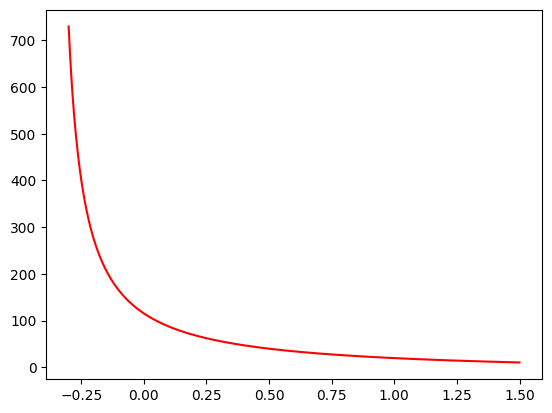

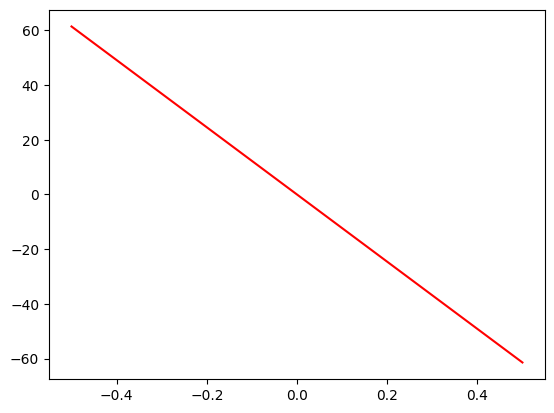

In [88]:
#   0.000 -1.000  0.000  0.000
#  -0.342  0.000 -0.940  0.188
#   0.940  0.000 -0.342  0.068
#   0.000  0.000  0.000  1.000
# open up rviz and add a tf
# ros2 run robot_state_publisher robot_state_publisher cam.urdf
# rviz2
# this clearly shows how varying the vector in camera frame changes the coordinates in the world frame
#  should check that in code this transform is alligned with this one obtained from tf2_ros tf2_echo camera_optical_link base_link
# and the vector should be correctly obtained from image : )
T = np.array([
    [0.000, -1.000,  0.000],
    [-0.342,  0.000, -0.940],
    [0.940,  0.000, -0.342],
])
T # = np.linalg.inv(T)
vt = np.array([0, .9, 1])
# vt /= np.linalg.norm(vt)
vtb = np.linalg.inv(T) @ vt
print(vtb)
H = 42
lr = np.array([[0, 0, -1]]).T
d = H / (lr.T @ vtb)
vtb * d, vt

y = np.linspace(-.3, 1.5, 1000)
vt = np.array([np.zeros_like(y), y, np.ones_like(y)])
vt /= np.linalg.norm(vt, axis=0)
vtb = np.linalg.inv(T) @ vt  # 3,1000
d = H / (lr.T @ vtb)
res = vtb * d
plt.plot(y, res[0, :], 'r')

y = np.linspace(-.5, .5, 1000)
vt = np.array([y, np.zeros_like(y), np.ones_like(y)])
vt /= np.linalg.norm(vt, axis=0)
vtb = np.linalg.inv(T) @ vt  # 3,1000
d = H / (lr.T @ vtb)
res = vtb * d
plt.figure()
plt.plot(y, res[1, :], 'r')


# for v in np.linspace(-.9, .9, 1000):
#     print(v)
#     break

# plot_rot(T)

In [146]:
import math

def pixel_to_camera_frame_unit_vector(x, y, fx, fy, cx, cy):
    x_norm = (x - cx) / fx
    y_norm = (y - cy) / fy
    z_c = 1  # Z is always 1 in this case
    u_c = x_norm
    v_c = y_norm
    w_c = z_c
    length = math.sqrt(u_c**2 + v_c**2 + w_c**2)
    u_c_normalized = u_c / length
    v_c_normalized = v_c / length
    w_c_normalized = w_c / length
    return u_c_normalized, v_c_normalized, w_c_normalized

# Example usage:
x_pixel = 0
y_pixel = 200  # this has a singularity at some point, when closing in on the horizon
fx = 500  # Focal length in the x-direction
fy = 500  # Focal length in the y-direction
cx = 320  # Principal point x-coordinate
cy = 240  # Principal point y-coordinate
u_c, v_c, w_c = pixel_to_camera_frame_unit_vector(
    x_pixel, y_pixel, fx, fy, cx, cy)
print(f"Unit Vector in Camera Frame (u_c, v_c, w_c): ({u_c}, {v_c}, {w_c})")

K = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0, 0, 1]
])
Kinv = np.linalg.inv(K)
Puv = np.array([x_pixel, y_pixel, 1])
vt = (Kinv @ Puv) / np.linalg.norm(Kinv @ Puv)

T = np.array([
    [0.000, -1.000,  0.000],
    [-0.342,  0.000, -0.940],
    [0.940,  0.000, -0.342],
])
# T = np.linalg.inv(T)
vtb = np.linalg.inv(T) @ vt
H = 42
lr = np.array([[0, 0, -1]]).T
d = H / (lr.T @ vtb)
vtb * d, vt, d, (lr.T @ vtb)

Unit Vector in Camera Frame (u_c, v_c, w_c): (-0.5378341163622515, -0.06722926454528144, 0.840365806816018)


(array([152.28305847, 100.80644798, -42.        ]),
 array([-0.53783412, -0.06722926,  0.84036581]),
 array([187.43037102]),
 array([0.22408321]))

In [96]:
T, 

# [estimation_node-2]  2.22045e-16           -1  1.55477e-16
# [estimation_node-2]     -0.34202 -2.22045e-16    -0.939693
# [estimation_node-2]     0.939693  1.55477e-16     -0.34202

Tc = np.array([
    [0.000, -1.000,  0.000],
    [-0.342,  0.000, -0.940],
    [0.940,  0.000, -0.342],
])

T - Tc

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [150]:
# height: 1080
# width: 1920

1920/2/2

480.0

In [91]:
# Kinv
# [estimation_node-3] 0.00143141          0  -0.687077
# [estimation_node-3]          0 0.00143141  -0.386481
# [estimation_node-3]          0          0          1
# R
# [estimation_node-3]  -0.322468  -0.262803  -0.909368
# [estimation_node-3] -0.0920493    0.96484  -0.246193
# [estimation_node-3]   0.942094 0.00431747  -0.335321
# Rf
# [estimation_node-3]        0        0  698.612
# [estimation_node-3] -698.612        0        0
# [estimation_node-3]        0 -698.612        0

Kinv = np.array([[0.00143141, 0, -0.687077],
                 [0, 0.00143141, -0.386481],
                 [0, 0, 1]])
R = np.array([[-0.322468, -0.262803, -0.909368],
              [-0.0920493, 0.96484, -0.246193],
              [0.942094, 0.00431747, -0.335321]])
R = np.linalg.inv(R)
# width = 475 * 2
# hfov = 2 * np.arctan(width / (2 * 1/0.00143141))
# width / (2 * np.tan(hfov))
f = 100  # width / (2 * np.tan(hfov)) * 100
Rf = np.array([[0, 0, 1],
               [-1, 0, 0],
               [0, -1, 0]])
Puv = np.array([[475, 400, 1]]).T
H = 42
lr = np.array([[0, 0, -1]]).T
ls = R @ ((Rf@Kinv@Puv) / np.linalg.norm(Rf@Kinv@Puv))
d = H/(lr.T @ ls)
Pt = ls * d
# Pt, d, np.cos(np.arccos(lr.T @ -ls)), np.cos(np.arccos(lr.T @ ls)), ls, Rf
# (R @ Kinv@Puv) / np.linalg.norm(R @ Kinv@Puv)
# d = H / (lr.T @ (R @ Kinv@Puv))
np.linalg.norm(Pt), Pt

(50.3363191577553,
 array([[-24.66534172],
        [-12.70298958],
        [-42.        ]]))

In [177]:
fx = fy = 1/0.00143141
x = y = 0
cx = fx * 0.68
cy = fy * 0.38
alpha = (x - cx) / fx
beta = (y - cy) / fy
P = np.array([alpha * H, beta * H, H]).T
np.linalg.norm(P), cx, cy, fx

(53.23903830836917, 475.05606360162363, 265.47250613031906, 698.6118582376818)

In [144]:
#     x: 144.64607083821994
#     y: 18.607153121477943
#     z: 0.3497640879164825
#   orientation:
#     x: -0.002865465387466681
#     y: 0.0038769815049568713
#     z: 0.5918198930661231
#     w: 0.8060558121456144
# - position:
#     x: 90.92814432338693
#     y: 8.228197564865308
#     z: 43.02905375602216

t_vec = np.array([90.92814432338693, 8.228197564865308, 43.02905375602216])
t_vec0 = np.array([144.64607083821994, 18.607153121477943, 0.3497640879164825])
np.linalg.norm(t_vec0 - t_vec)

69.38919306400105

In [17]:
f = 1/0.00143141
f * 0.68, f * 0.38

(475.05606360162363, 265.47250613031906)

In [5]:
DEG2RAD = np.pi/180
params = {
    "f": 0.008,
    "rho": 10e-6,
    "imagesize": (640, 480),
    "pp": (640/2, 480/2),
    "name": "default perspective camera",
    # spatialmath.SE3.Tz(-2.5) * spatialmath.SE3.Rx(2*DEG2RAD) * spatialmath.SE3.Ry(0*DEG2RAD) * spatialmath.SE3.Rz(3*DEG2RAD),
    "pose": spatialmath.SE3.Ry(20*DEG2RAD),
}
cam = mv.CentralCamera(**params)
cam, cam.K

(           Name: default perspective camera [CentralCamera]
      pixel size: 1e-05 x 1e-05
      image size: 640 x 480
            pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 20°
    principal pt: [320. 240.]
    focal length: [0.008 0.008],
 array([[800.,   0., 320.],
        [  0., 800., 240.],
        [  0.,   0.,   1.]]))

In [8]:
np.linalg.inv(cam.K)

array([[ 0.00125,  0.     , -0.4    ],
       [ 0.     ,  0.00125, -0.3    ],
       [ 0.     ,  0.     ,  1.     ]])

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

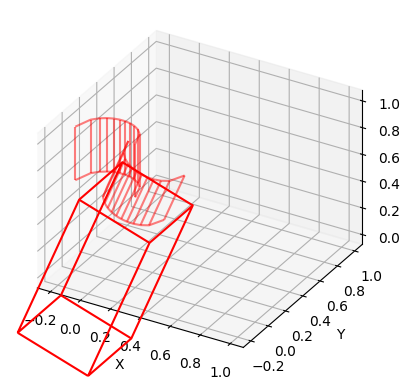

In [63]:
cam.plot()

In [61]:
cam.ray((320, 320)).A

array([0.        , 0.        , 0.        , 0.17364818, 0.        ,
       0.98480775])

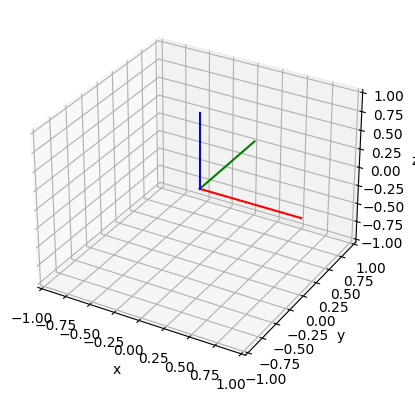

In [178]:
# plot a rotation matrix as unit vectors in 3d
R = tf.euler.euler2mat(0, 0, 0)

plot_rot(R)

In [23]:
# camera optical axis
Rcw = np.array([[0, 0, 1], [-1, 0, 0], [0, -1, 0]])
plot_rot(Rcw)

NameError: name 'plot_rot' is not defined

In [56]:
Rec = tf.euler.euler2mat(0.0, 0, 0.0, 'sxyz')
Rec = Rec @ np.linalg.inv(Rcw)
size_half = 240
f = size_half
Rf = np.array([[0, 0, f], [-f, 0, 0], [0, -f, 0]])
K = np.array([[f, 0, size_half], [0, f, size_half], [0, 0, 1]])
Kinv = np.linalg.inv(K)
Puv = np.array([[size_half, size_half, 1]]).T
H = 10
lr = np.array([[0, 0, -1]]).T
ls = Rec @ ((Rf@Kinv@Puv) / np.linalg.norm(Rf@Kinv@Puv))
d = H/(lr.T@ls)
Pt = ls * d
Pt

array([[ -0.],
       [ -0.],
       [-10.]])

In [78]:
# rotation from camera frame to world frame

# 0.000 -1.000  0.000
# 0.000  0.000 -1.000
# 1.000  0.000  0.000

Rcw = np.array([[0, -1, 0], [0, 0, -1], [1, 0, 0]])
vec_z = np.array([[0, 0, 1]]).T
Rcw @ vec_z

array([[ 0],
       [-1],
       [ 0]])

In [24]:
# Eigen::Matrix<double, 3, 3> K;
# double scale_K = 640.0 / 1920.0;

# // height: 1080
# // width: 1920
# // cv::Size(640, 480)


1080 / 480, 1920 / 640

(2.25, 3.0)

In [22]:
# size_t row = std::floor(i / 3);
# size_t col = i % 3;

for i in range(9):
    row = int(i / 3)
    col = i % 3
    print(i, row, col)

K = np.array([[200, 0, 120], [0, 200, 160], [0, 0, 1]])
np.linalg.inv(K)

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2


array([[ 0.005,  0.   , -0.6  ],
       [ 0.   ,  0.005, -0.8  ],
       [ 0.   ,  0.   ,  1.   ]])

In [19]:
DEG2RAD = np.pi / 180.0
R_base2cam = tf.euler.euler2mat(0, 20*DEG2RAD, 0, 'sxyz')
R_cam2base = np.linalg.inv(R_base2cam)
R_base2enu = tf.euler.euler2mat(0, 0, 20*DEG2RAD, 'sxyz')
R_cam2base

array([[ 0.93969262,  0.        , -0.34202014],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.34202014,  0.        ,  0.93969262]])

In [18]:
# xyz: 0.083636 0.090967 -43.011002;
P = np.array([0.083636, 0.090967, -43.011002])
R_base2enu @ R_cam2base @ P

array([ 13.86620948,   5.14369257, -40.388516  ])

<Figure size 640x480 with 0 Axes>

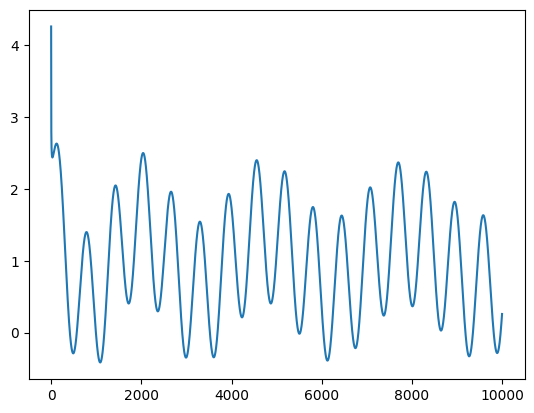

<Figure size 640x480 with 0 Axes>

In [32]:
# generate a 1d path
t = np.linspace(0, 50, 10000)
# prepend some zeros to the path
# t = np.concatenate((np.zeros(1), t))
dt = t[1]-t[0]
x = np.sin(t)**2 + np.sin(t**.8) + t
vel = np.gradient(x, dt, edge_order=2)
acc = np.gradient(vel, dt, edge_order=2)
plt.plot(vel)
plt.figure()
# lmdb = np.log(t)/10 + 1 #lambda scaling of x
# plt.plot(lmdb)

In [33]:
t.shape

(10000,)

In [34]:
# # scale x by lambda
# x_meas = x*lmdb
# plt.plot(x_meas)

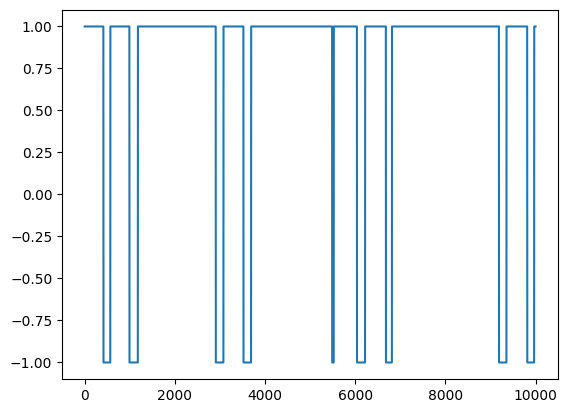

In [35]:
delta_x = np.gradient(x, 1)
# nomalize delta_x to 1 if positive, -1 if negative
delta_x_direction = delta_x/np.abs(delta_x)
plt.plot(delta_x_direction)

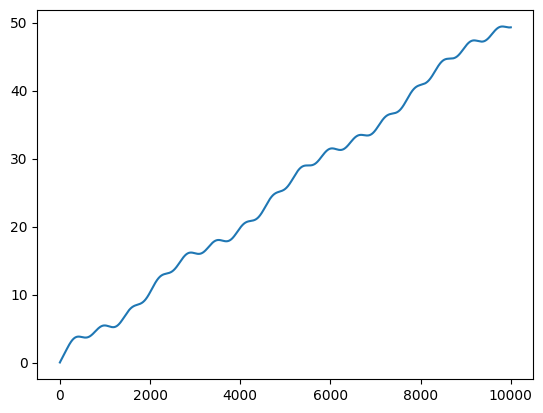

In [36]:
delta_x
# integrate delta_x
x_int = np.cumsum(delta_x)
plt.plot(x_int)

In [37]:
delta_x[-1]

0.0012717049321864238

In [47]:
# kalman filter
# state = [x,v,a,lambda]

# x state transition xk1 = xk + (v*dt)/lambda + (1/2*a*dt^2)/lambda
# v state transition vk1 = vk + a*dt/lambda
# a state transition ak1 = ak
# lambda state transition lambda_k1 = lambda_k
# state transition matrix

def get_F(state):
    F = np.array([[1, dt/state[3], (dt**2)/(2*state[3]), 0],
                  [0, 1, dt/state[3], 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return F


def nonlin_f(state):
    f = np.array([state[0] + (state[1]*dt)/state[3] + (state[2]*dt**2)/(2*state[3]),
                  state[1] + (state[2]*dt)/state[3],
                  state[2],
                  state[3]])
    return f

# measurements are
# z1 = xk/lambda
# z2 = a


def nonlin_h(state):
    h = np.array([state[0]/state[3],
                  state[2]])
    return h


def get_H(state):
    H = np.array([[1/state[3], 0, 0, -state[0]/(state[3]**2)],
                  [0, 0, 1, 0]])
    return H


# EKF
# initialize state
state = np.array([x[0], vel[0], acc[0], delta_x[0]])
# initialize covariance
P = np.eye(4)*10
# initialize measurement noise
R = np.eye(2)
# initialize process noise
Q = np.eye(4)

nonlin_h(state)

# run filter
state_hist = []
for i in range(len(x)):
    # predict
    state = nonlin_f(state)
    F = get_F(state)
    P = F @ P @ F.T + Q
    # update
    H = get_H(state)
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    z = np.array([delta_x_direction[i], acc[i]])
    state = state + K @ (z - nonlin_h(state))
    P = (np.eye(4) - K @ H) @ P
    state_hist.append(state)
state_hist[-20:], P

([array([-1.673403  ,  1.44681329,  1.59456316, -1.67106386]),
  array([-1.67587614,  1.44074877,  1.60794119, -1.67294219]),
  array([-1.67815734,  1.43453071,  1.62116812, -1.67496829]),
  array([-1.68034437,  1.42822853,  1.63424264, -1.67705002]),
  array([-1.68248124,  1.42187383,  1.64716345, -1.67914774]),
  array([-1.68458772,  1.41548111,  1.65992928, -1.68124434]),
  array([-1.68667271,  1.40905716,  1.67253887, -1.68333244]),
  array([-1.68874023,  1.40260535,  1.68499098, -1.68540887]),
  array([-1.69079212,  1.39612746,  1.69728436, -1.68747228]),
  array([-1.69282921,  1.3896246 ,  1.70941781, -1.68952211]),
  array([-1.69485192,  1.38309756,  1.72139013, -1.69155813]),
  array([-1.69686045,  1.376547  ,  1.73320013, -1.69358028]),
  array([-1.69885491,  1.3699735 ,  1.74484665, -1.69558854]),
  array([-1.70083537,  1.36337762,  1.75632854, -1.69758292]),
  array([-1.70280188,  1.35675991,  1.76764467, -1.69956346]),
  array([-1.7047545 ,  1.35012092,  1.77879391, -1.7015

In [44]:
state_hist[-1][0]/state_hist[-1][3]

0.9536004452646354

In [ ]:
# integrate acc over 7 samples
p = 0
v = 0
for i in range(int(1/dt)):
    p = p + v*dt
    v = v + acc[i]*dt
p

0.24878105278697527

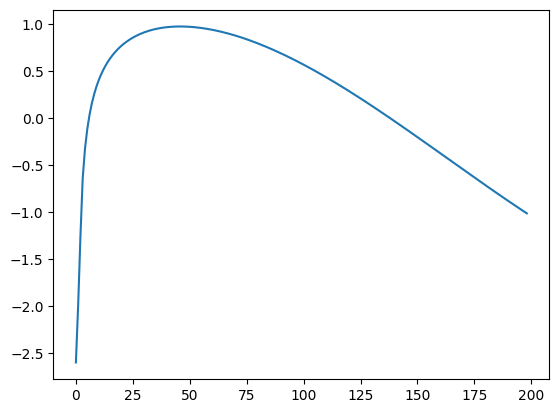

In [ ]:
plt.plot(acc[:int(1/dt)])